In [121]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

Read the data and save it in a data frame type.

In [122]:
df = pd.read_csv('MatchAwayTeamInfo.csv')
df1=pd.read_csv('MatchHomeTeamInfo.csv')

Remove missing values from data using forward fill strategy.

In [123]:
df.fillna(method='ffill', inplace=True)
df

C:\Users\mahdi\AppData\Local\Temp\ipykernel_9376\3303779087.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,12260075,Lehečka J.,lehecka-jiri,M,6858,"Knezmost, Czech Republic","Mlada Boleslav, Czechia",1.85,80.0,right-handed,NaN,763346.0,2988783.0,254742,24.0,LEH,Czech Republic,"Lehečka, Jiří"
1,12260076,Khachanov K.,khachanov-karen,M,14411,"Dubai, UAE","Moscow, Russia",1.98,87.0,right-handed,2013.0,877460.0,13580818.0,90080,18.0,KHA,Russia,"Khachanov, Karen"
2,12260077,Alcaraz C.,alcaraz-carlos,M,141553,"El Palmar, Murcia, Spain","El Palmar, Murcia, Spain",1.83,68.0,right-handed,2018.0,1590518.0,24112308.0,275923,3.0,ALC,Spain,"Alcaraz, Carlos"
3,12260078,Alcaraz C.,alcaraz-carlos,M,141553,"El Palmar, Murcia, Spain","El Palmar, Murcia, Spain",1.83,68.0,right-handed,2018.0,1590518.0,24112308.0,275923,3.0,ALC,Spain,"Alcaraz, Carlos"
4,12260080,Zverev A.,zverev-alexander,M,60430,"Monte Carlo, Monaco","Hamburg, Germany",1.98,90.0,right-handed,2013.0,2676831.0,34897595.0,57163,4.0,ZVE,Germany,"Zverev, Alexander"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13407,12384975,Șerban R.,serban-raluca-georgiana,F,832,Balneário Camboriú,Merlo,1.91,76.0,right-handed,2007.0,43717.0,340468.0,103375,200.0,SER,Cyprus,"Serban, Raluca Georgiana"
13408,12385017,Pedretti T.,pedretti-thaisa-grana,F,453,Balneário Camboriú,Merlo,1.91,76.0,right-handed,2007.0,2598.0,70165.0,120664,647.0,PED,Brazil,"Pedretti, Thaisa Grana"
13409,12385869,Fukuda S.,fukuda-sora,M,139,"Bradenton, FL",Japan,1.80,72.0,left-handed,2007.0,1278.0,52832.0,103913,611.0,FUK,Japan,"Fukuda, Sora"
13410,12385873,Uchida K.,uchida-kaichi,M,760,"Bradenton, FL",Japan,1.80,72.0,right-handed,2013.0,10488.0,444064.0,82579,483.0,UCH,Japan,"Uchida, Kaichi"


In [124]:
df1.fillna(method='ffill',inplace=True)
df1

C:\Users\mahdi\AppData\Local\Temp\ipykernel_9376\1499619760.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.fillna(method='ffill',inplace=True)


,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,12260075,Nadal R.,nadal-rafael,M,183436,"Manacor, Mallorca, Spain","Manacor, Mallorca, Spain",1.85,85.0,left-handed,2001.0,138859.0,112340134.0,14486,276.0,NAD,Spain,"Nadal, Rafael"
1,12260076,Sinner J.,sinner-jannik,M,99188,"Monte Carlo, Monaco","San Candido, Italy",1.88,68.0,right-handed,2018.0,3692708.0,17916067.0,206570,2.0,SIN,Italy,"Sinner, Jannik"
2,12260077,Struff J.,struff-jan-lennard,M,8295,"Warstein, Germany","Warstein, Germany",1.93,92.0,right-handed,2009.0,524212.0,8477803.0,46391,39.0,STR,Germany,"Struff, Jan-Lennard"
3,12260078,Rublev A.,rublev-andrey,M,38304,"Moscow, Russia","Moscow, Russia",1.88,70.0,right-handed,2014.0,1673795.0,19663800.0,106755,6.0,RUB,Russia,"Rublev, Andrey"
4,12260080,Cerundolo F.,cerundolo-francisco,M,10628,"Argentina, Buenos Aires","Buenos Aires, Argentina",1.85,78.0,right-handed,2014.0,583759.0,3845888.0,221012,23.0,CER,Argentina,"Cerundolo, Francisco"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14631,12384892,Chazal M.,chazal-maxime,M,448,"Nouméa, New Caledonia",Nouméa,1.75,71.0,right-handed,2010.0,7695.0,167038.0,17065,561.0,CHA,France,"Chazal, Maxime"
14632,12384975,Bandecchi S.,bandecchi-susan,F,613,"Nouméa, New Caledonia",Nouméa,1.75,71.0,right-handed,2010.0,6773.0,265306.0,96061,344.0,BAN,Switzerland,"Bandecchi, Susan"
14633,12385017,Ortenzi J.,ortenzi-jazmin,F,463,"Nouméa, New Caledonia",Nouméa,1.75,71.0,right-handed,2010.0,8586.0,51038.0,254281,527.0,ORT,Argentina,"Ortenzi, Jazmin"
14634,12385869,Masabayashi T.,masabayashi-tomohiro,M,102,"Nouméa, New Caledonia",HYOGO,1.70,71.0,right-handed,2010.0,463.0,16051.0,154486,1149.0,MAS,Japan,"Masabayashi, Tomohiro"


1- Get the number of players from the MatchHomeTeamInfo(df) and MatchAwayTeamInfo(df1).

In [125]:
countOfHomeTeamPlayers=df.groupby(['player_id']).agg({"player_id": lambda x: x.nunique()}).count()
countOfAwayTeamPlayers=df1.groupby(['player_id']).agg({"player_id": lambda x: x.nunique()}).count()

print("Number of home team players:",countOfHomeTeamPlayers)
print("Number of away team players:",countOfAwayTeamPlayers)

print("Total number of players:",countOfHomeTeamPlayers+countOfAwayTeamPlayers)


Number of home team players: player_id    2039
dtype: int64
Number of away team players: player_id    2045
dtype: int64
Total number of players: player_id    4084
dtype: int64


2. What is the average height of the players?

In [141]:
match_away_team_df=pd.read_csv('MatchAwayTeamInfo.csv')
match_home_team_df=pd.read_csv('MatchHomeTeamInfo.csv')
match_home_name_height=match_home_team_df.iloc[:,[1,7]]
match_home_name_height=match_home_team_df.iloc[:,[1,7]]
height_player=pd.concat([match_home_name_height,match_home_name_height])
height_player['height'].dropna(inplace=True)
height_player.drop_duplicates(inplace=True)
height_player['height'].mean()

np.float64(1.819877358490566)

According to the given information, the average height of the players in this series of matches is 1.82

3. Which player has the highest number of wins?

In [127]:
dfEvent = pd.read_csv('MatchEventInfo.csv')
dfEvent.fillna(method='ffill',inplace=True)
dfWinner=dfEvent[['match_id','winner_code']]
dfWinner


C:\Users\mahdi\AppData\Local\Temp\ipykernel_9376\2621603447.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfEvent.fillna(method='ffill',inplace=True)


,match_id,winner_code
0,12260075,2.0
1,12260076,1.0
2,12260077,2.0
3,12260078,1.0
4,12260080,1.0
...,...,...
20516,12384975,1.0
20517,12385017,1.0
20518,12385869,2.0
20519,12385873,2.0


In [128]:
merged_df = pd.merge(df, df1, on='match_id', how='inner', suffixes=('_player1', '_player2'))
merged_df=merged_df[['match_id','name_player1', 'name_player2']]
merged_df = merged_df.fillna(method='ffill')

merged_df

C:\Users\mahdi\AppData\Local\Temp\ipykernel_9376\850651020.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df = merged_df.fillna(method='ffill')


,match_id,name_player1,name_player2
0,12260075,Lehečka J.,Nadal R.
1,12260076,Khachanov K.,Sinner J.
2,12260077,Alcaraz C.,Struff J.
3,12260078,Alcaraz C.,Rublev A.
4,12260078,Alcaraz C.,Rublev A.
...,...,...,...
26677,12384892,Gomez F.,Chazal M.
26678,12384975,Șerban R.,Bandecchi S.
26679,12385017,Pedretti T.,Ortenzi J.
26680,12385869,Fukuda S.,Masabayashi T.


In [129]:
playerWinner = pd.merge(merged_df, dfWinner, on='match_id', how='inner')
playerWinner['winner_name'] = playerWinner.apply(lambda row: row['name_player1'] if row['winner_code'] == 1.0 else row['name_player2'], axis=1)

# Determine which player wins the most matches
winner_counts = playerWinner['winner_name'].value_counts()
print("The player who wins the most matches is:", winner_counts.idxmax())


The player who wins the most matches is: Wolf J.J.


4. What is the longest match recorded in terms of duration?

In [130]:
match_time_df=pd.read_csv('MatchTimeInfo.csv')
match_time_df.head()
match_time_df.fillna(0,inplace=True)
match_time_df.drop_duplicates(inplace=True)

In [131]:

match_time_df['sumation_time_periods_match']=match_time_df.iloc[:,[1,2,3,4,5]].sum(axis=1)
match_time_df.head()

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp,sumation_time_periods_match
0,12260075,3463.0,3855.0,0.0,0.0,0.0,1.714511e+09,7318.0
1,12260076,3032.0,2121.0,2674.0,0.0,0.0,1.714492e+09,7827.0
2,12260077,2747.0,3525.0,4074.0,0.0,0.0,1.714492e+09,10346.0
3,12260078,2519.0,2531.0,2121.0,0.0,0.0,1.714578e+09,7171.0
4,12260080,2616.0,2766.0,0.0,0.0,0.0,1.714483e+09,5382.0


In [132]:
longest_time=match_time_df['sumation_time_periods_match'].max()
longest_match=match_time_df.loc[(match_time_df['sumation_time_periods_match']==longest_time),:]
longest_match

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp,sumation_time_periods_match
13350,12346747,167761.0,3392.0,0.0,0.0,0.0,1.716382e+09,171153.0


According to the given information ,the longest match recorded in terms of duration is the match with match-id:12346747 with 171153ps or 16h



5. How many sets are typically played in a tennis match?

In [133]:
dfPower = pd.read_csv('PowerInfo.csv')
dfPower.head()
num_sets_per_match = dfPower.groupby('match_id')['set_num'].nunique()
print(num_sets_per_match)

match_id
12260075    2
12260076    3
12260077    3
12260078    3
12260080    2
           ..
12384789    2
12384806    3
12384892    2
12384975    3
12385017    3
Name: set_num, Length: 6658, dtype: int64


6. Which country has produced the most successful tennis players?

In [134]:
country_current_rank=pd.concat([match_away_team_df[['name','country','current_rank']],match_home_team_df[['name','country','current_rank']]]).sort_values('current_rank').drop_duplicates().dropna().iloc[:,:]
country_current_rank.loc[country_current_rank['current_rank']<4 ,:].country.unique()
country_current_rank

,name,country,current_rank
13359,Świątek I.,Poland,1.0
11242,Djokovic N.,Serbia,1.0
11529,Sabalenka A.,Belarus,2.0
11035,Sinner J.,Italy,2.0
6170,Gauff C.,USA,3.0
...,...,...,...
1395,Zhzhenov K.,Russia,1635.0
7545,Hsu J.,Chinese Taipei,1717.0
2897,Stenberg J.,Sweden,1800.0
2514,Amoros Ramos P.,Spain,1858.0


In [135]:
country_current_rank.drop(columns='name',inplace=True)
a=country_current_rank.groupby('country',as_index=False).mean().sort_values('current_rank').head()
a


,country,current_rank
69,Philippines,161.000000
1,Andorra,294.666667
55,Malta,330.500000
83,Syria,344.000000
13,Burundi,371.000000


In [136]:
winner_counts

winner_name
Wolf J.J.        143
Fonio G.         133
Kopřiva V.       118
Munar J.         116
Primorac I.      115
                ... 
Hsu J.             1
Hutchinson H.      1
Yaneva E.          1
Matusevich A.      1
Pedretti T.        1
Name: count, Length: 2213, dtype: int64

In [137]:
winner_counts
name_country=pd.concat([match_away_team_df[['name','country']],match_home_team_df[['name','country']]]).drop_duplicates().dropna().iloc[:,:]
name_country_winner_count=pd.merge(name_country,winner_counts,left_on='name',right_on='winner_name')
name_country_winner_count.drop(columns='name',inplace=True).sort()
name_country_winner_count.sort('count')

AttributeError: 'NoneType' object has no attribute 'sort'

Considering the above tables the Poland, Serbia, Belarus, Italy, USA, Spain countries gained the top 3 ranks in order that each place filled by two, but it cannot be claimed that Which country exactly produces the best tennis players. Moreover, based on the overall average ranks, The Philippines produced the best average rank overally.

7. What is the average number of aces per match?

In [ ]:
dfPI=pd.read_csv('PeriodInfo.csv')
dfPI.fillna(method='ffill', inplace=True)
x1=dfPI.loc[dfPI['statistic_name'] == 'aces']
grp = x1.groupby('match_id')
data_agg=grp['statistic_name'].count()
data_agg
#data_agg['Avg num of aces']=data_agg/data_agg.sum()
data_agg = data_agg/data_agg.sum()

data_agg


C:\Users\mahdi\AppData\Local\Temp\ipykernel_9376\1230797551.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfPI.fillna(method='ffill', inplace=True)


match_id
12260075    0.000068
12260076    0.000091
12260077    0.000091
12260078    0.000181
12260080    0.000068
              ...   
12384975    0.000091
12385017    0.000091
12385869    0.000068
12385873    0.000068
12386383    0.000091
Name: statistic_name, Length: 6797, dtype: float64

8. Is there a difference in the number of double faults based on gender?

In [ ]:
gender_match_away=match_away_team_df[['match_id','gender']]
gender_match_home=match_home_team_df[['match_id','gender']]
gender_match_id=pd.concat([gender_match_away,gender_match_home])
gender_match_id.drop_duplicates(inplace=True)

In [ ]:
period=pd.read_csv('PeriodInfo.csv')
period.drop_duplicates(inplace=True)
match_id_statistic_name=period[['match_id','statistic_name']]
match_id_double_faults=match_id_statistic_name.loc[match_id_statistic_name.statistic_name == 'double_faults']

In [ ]:
gender_double_faults=pd.merge(match_id_double_faults,gender_match_id,on='match_id')
gender_double_faults

,match_id,statistic_name,gender
0,12260075,double_faults,M
1,12260075,double_faults,M
2,12260075,double_faults,M
3,12260076,double_faults,M
4,12260076,double_faults,M
...,...,...,...
31250,12385873,double_faults,M
31251,12386383,double_faults,F
31252,12386383,double_faults,F
31253,12386383,double_faults,F


In [ ]:
gender_double_faults.drop(columns='match_id', inplace=True)
gender_double_faults.groupby(['gender']).count()


,statistic_name
gender,
F,15596
M,15553


in conclusion of the given information, there are no difference between male and female in the number of double fault approximatelly

9. Which player has won the most tournaments in a single month?
We use the playerWinner dataframe previousely produced in question 3. It contains 'match_id', 'name_player1', 'name_player2' and 'winner_name' fields. Now we join this dataframe with the MatchTournamentInfo dataframe to get the player that won the most tournaments.

In [ ]:
dfTournament=pd.read_csv('MatchTournamentInfo.csv')

playerWinnerTourn = pd.merge(playerWinner, dfTournament, on='match_id', how='inner')
playerWinnerTourn=playerWinnerTourn[['match_id','name_player1','name_player2','tournament_id','winner_name']]
playerWinnerTourn

# Count the number of wins for each player
player_wins = playerWinnerTourn.groupby('winner_name').size().reset_index(name='wins')

# Sort the results by the number of wins in descending order
player_wins = player_wins.sort_values(by='wins', ascending=False)

# Print the player who wins the most tournaments
print("The player who wins the most tournaments is:", player_wins.iloc[0]['winner_name'])

The player who wins the most tournaments is: Wolf J.J.


10. Is there a correlation between a player's height and their ranking?

ValueError: cannot reindex on an axis with duplicate labels

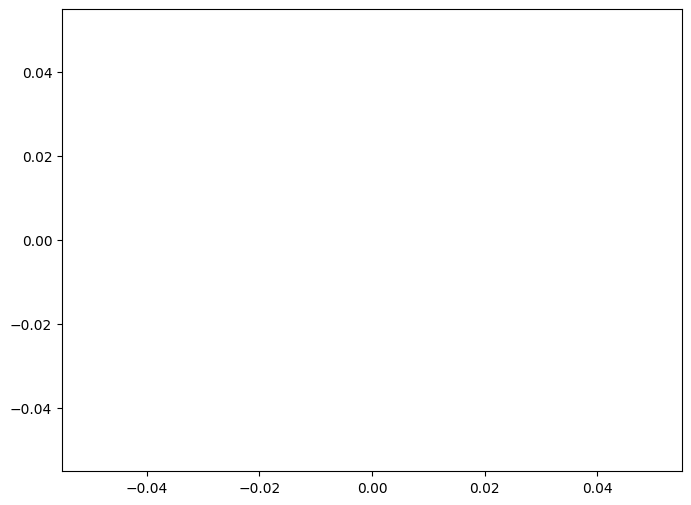

In [143]:
match_home_team_height_rank_df=match_home_team_df.iloc[:,[17,7,14]]
match_away_team_height_rank_df=match_away_team_df.iloc[:,[17,7,14]]
match_away_team_height_rank_df
height_rank_player=pd.concat([match_home_team_height_rank_df,match_away_team_height_rank_df])
height_rank_player.drop_duplicates()
height_rank_player.dropna()
# height_rank_player.head()

height_rank_player.set_index('full_name', inplace=True)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='height', y='current_rank', data=height_rank_player)
plt.title('Correlation Between Height and Current Rank')
plt.xlabel('Height (m)')
plt.ylabel('Current Rank')
plt.grid(True)
plt.show()

In [144]:
height_rank_correlation=height_rank_player['height'].corr(height_rank_player['current_rank'])
if height_rank_correlation <0.3:
    print('There is a weak corrilation between players height and there rank')
elif 0.3<height_rank_correlation<0.5:
    print('There is a moderate corrilation between players height and there rank')
else:
    print('There is a strong corrilation between players height and there rank')    

There is a weak corrilation between players height and there rank


According to the given information,it cannot be claimed that there is a corrilation between players height and there rank

In [138]:
height_rank_player.set_index('full_name', inplace=True)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='height', y='current_rank', data=height_rank_player)
plt.title('Correlation Between Height and Current Rank')
plt.xlabel('Height (m)')
plt.ylabel('Current Rank')
plt.grid(True)
plt.show()
 

KeyError: "None of ['full_name'] are in the columns"

11. What is the average duration of matches?

In [ ]:
match_time_df=pd.read_csv('MatchTimeInfo.csv')
match_time_df.head()
match_time_df.fillna(0,inplace=True)
match_time_df.drop_duplicates(inplace=True)
match_time_df['sumation_time_periods_match']=match_time_df.iloc[:,[1,2,3,4,5]].sum(axis=1)
match_time_df.head()
average_time=match_time_df['sumation_time_periods_match'].mean()

print("The average duration of matches is:", average_time)

The average duration of matches is: 5794.928679418918


12. What is the average number of games per set in men's matches compared to women's matches?

In [ ]:
power_info_df=pd.read_csv('PowerInfo.csv')
set_game_powerinfo=power_info_df.iloc[:,[0,1,2]]
set_game_count=set_game_powerinfo.groupby(['match_id','set_num']).count()
set_game_count.drop_duplicates().head()


game_num
match_id set_num          
12260075 1              12
         2              10
12260076 2               9
12260077 2              13
12260078 1              20

In [ ]:
gender_games_no=pd.merge(set_game_count,gender_match_id,on='match_id')
gender_games_no.head()

,match_id,game_num,gender
0,12260075,12,M
1,12260075,10,M
2,12260076,12,M
3,12260076,9,M
4,12260076,9,M


In [ ]:
gender_games_no.drop(columns='match_id', inplace=True)
mean_gender_games_no=gender_games_no.groupby(['gender']).mean()
mean_gender_games_no

,game_num
gender,
F,17.355954
M,18.095078


On average, in men's matches, each set has 18 games and in women's matches, each set has 17 games

13. What is the distribution of left-handed versus right-handed players?

The distribution of right-handed players versus left-handed: plays
right-handed    23630
left-handed      3186
ambidextrous        8
Name: count, dtype: int64
The distribution of right-handed players versus left-handed: plays
right-handed    88.092753
left-handed     11.877423
ambidextrous     0.029824
Name: count, dtype: float64


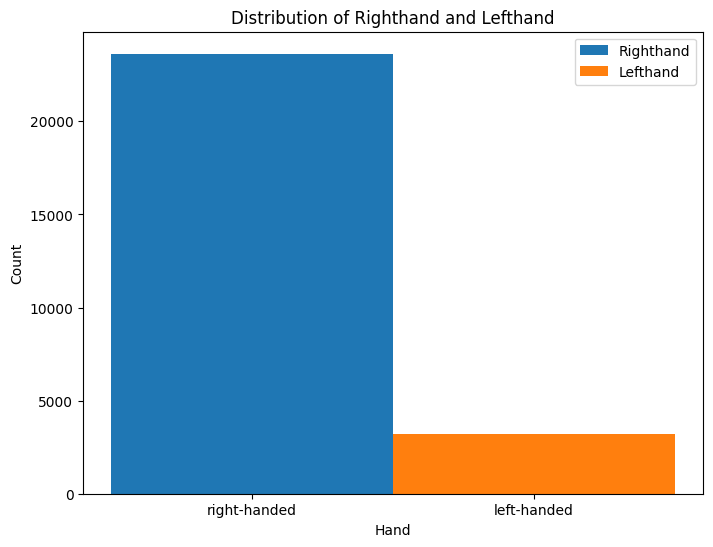

In [ ]:
import matplotlib.pyplot as plt

df = df.loc[df['plays'].notnull()]

df1 = df.loc[df['plays'].notnull()]

#concat two tables home and away teams
combined_df = pd.concat([df, df1])
distribution = combined_df['plays'].value_counts()

print("The distribution of right-handed players versus left-handed:",distribution)

percentage_distribution = (distribution / len(combined_df)) * 100
print("The distribution of right-handed players versus left-handed:",percentage_distribution)
# Draw a histogram to view the distribution
righthand_data = combined_df.loc[df['plays'] == 'right-handed']
lefthand_data = combined_df.loc[df['plays'] == 'left-handed']

fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(righthand_data['plays'], bins=1, label='Righthand')
ax.hist(lefthand_data['plays'], bins=1, label='Lefthand')

# Set labels and title
ax.set_xlabel('Hand')
ax.set_ylabel('Count')
ax.set_title('Distribution of Righthand and Lefthand')

# Add legend
ax.legend()

# Show the plot
plt.show()


14. What is the most common type of surface used in tournaments?

In [ ]:
match_tournament=pd.read_csv('MatchTournamentInfo.csv')
match_tournament.drop_duplicates(inplace=True)
ground_type_match=match_tournament[['ground_type','match_id']].groupby(['ground_type']).count()
ground_type_match.rename(columns={'match_id': 'number'},inplace=True)
ground_type_match


,number
ground_type,
Hardcourt indoor,241
Hardcourt outdoor,4606
Red clay,14238
Synthetic outdoor,93


In [ ]:
ground_type_match.loc[ground_type_match.number== ground_type_match.number.max(),:]

,number
ground_type,
Red clay,14238


the most common type of surface used in tournaments is 'Red clay' that used in '14237' tournaments

15. How many distinct countries are represented in the dataset?

In [ ]:
num_distinct_countries = combined_df['country'].nunique()

print(f"The dataset contains {num_distinct_countries} distinct countries.")

The dataset contains 95 distinct countries.


16. Which player has the highest winning percentage against top 10 ranked opponents?

In [ ]:
country_current_rank=pd.concat([match_away_team_df[['name','current_rank']],match_home_team_df[['name','current_rank']]]).sort_values('current_rank').drop_duplicates().dropna().iloc[0:12,:]
top_10_players=country_current_rank['name'].unique()

In [ ]:
game_info=pd.read_csv('GameInfo.csv')
point_count=game_info.iloc[:,[0,4,5]]
point_count.replace('A', pd.NA, inplace=True)
point_count['home_point'].fillna(0,inplace=True)
point_count['away_point'].fillna(0,inplace=True)
point_count['home_point'] = point_count['home_point'].astype(int)
point_count['away_point'] = point_count['away_point'].astype(int)

match_point_winner=point_count.groupby('match_id')[['home_point', 'away_point']].sum()
match_point_winner['winner_code'] = 0
match_point_winner.loc[match_point_winner['home_point'] > match_point_winner['away_point'], 'winner_code'] = 1
match_point_winner.loc[match_point_winner['home_point'] < match_point_winner['away_point'], 'winner_code'] = 2
match_winner=match_point_winner.iloc[:,[2]]
match_winner


C:\Users\mahdi\AppData\Local\Temp\ipykernel_9376\3163266593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  point_count.replace('A', pd.NA, inplace=True)
C:\Users\mahdi\AppData\Local\Temp\ipykernel_9376\3163266593.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  point_count['home_point'].fillna(0,inplace=True)
C:\Users\mahdi\AppData\Loc

,winner_code
match_id,
12260075,2
12260076,1
12260077,2
12260078,1
12260080,1
...,...
12384789,2
12384806,1
12384892,2


In [ ]:
merged_df = pd.merge(match_home_team_df, match_away_team_df, on='match_id', how='inner', suffixes=('_player1', '_player2'))
merged_df=merged_df[['match_id','name_player1', 'name_player2']]
player_winner = pd.merge(merged_df,match_winner, on='match_id', how='inner')
player_winner.drop_duplicates(inplace=True)
player_winner['winner_name'] = player_winner.apply(lambda row: row['name_player1'] if row['winner_code'] == 1.0 else row['name_player2'], axis=1)
player_winner['loser_name'] = player_winner.apply(lambda row: row['name_player1'] if row['winner_code'] == 2.0 else row['name_player2'], axis=1)
player_winner_loser=player_winner.iloc[:,[0,4,5]]
player_winner_loser

,match_id,winner_name,loser_name
0,12260075,Lehečka J.,Nadal R.
1,12260076,Sinner J.,Khachanov K.
2,12260077,Alcaraz C.,Struff J.
3,12260078,Rublev A.,Alcaraz C.
5,12260080,Cerundolo F.,Zverev A.
...,...,...,...
24555,12384789,Léonard M.,Kostic T.
24556,12384806,Kasnikowski M.,Dutra da Silva D.
24557,12384892,Gomez F.,Chazal M.
24558,12384975,Șerban R.,Bandecchi S.


In [ ]:
# Filter the dataframe to only include matches against top 10 players
top_10_matches =player_winner_loser[(player_winner_loser['loser_name'].isin(top_10_players))]
top_10_matches_winner=top_10_matches.iloc[:,[0,1]]

#  Count the number of wins for each winner
winner_counts = top_10_matches_winner['winner_name'].value_counts()

# Calculate the winning percentage for each winner
winner_percentages = (winner_counts / len(top_10_matches_winner)) * 100


# Find the player with the highest winning percentage
player_with_highest_win = winner_percentages.idxmax()
highest_win_pct = winner_percentages.max()

print(f"The player with the highest winning percentage against top 10 ranked opponents is {player_with_highest_win}  ,with {highest_win_pct} percent win")
winner_counts

The player with the highest winning percentage against top 10 ranked opponents is Świątek I.  ,with 15.789473684210526 percent win


winner_name
Świątek I.       3
Rublev A.        1
Cerundolo F.     1
Lehečka J.       1
Putintseva Y.    1
Sabalenka A.     1
Vukić A.         1
Draper J.        1
Moutet C.        1
Tabilo A.        1
Yastremska D.    1
Muller A.        1
Badosa P.        1
Međedović H.     1
Griekspoor T.    1
Zidanšek T.      1
Rus A.           1
Name: count, dtype: int64

extra question no1.
 Is there a correlation between a player's experiance and their ranking?  

In [ ]:
match_home_team_turned_rank_df=match_home_team_df.iloc[:,[17,10,14]]
match_away_team_turned_rank_df=match_away_team_df.iloc[:,[17,10,14]]
turned_rank_player=pd.concat([match_home_team_turned_rank_df,match_away_team_turned_rank_df])
turned_rank_player.drop_duplicates()
turned_rank_player.dropna(inplace=True)
turned_rank_player['experiance']=2024-turned_rank_player['turned_pro']
turned_rank_player.drop(columns='turned_pro', inplace=True)
turned_rank_player.drop_duplicates(inplace=True)
turned_rank_player.sort_values('current_rank')

,full_name,current_rank,experiance
498,"Swiatek, Iga",1.0,8.0
4570,"Djokovic, Novak",1.0,21.0
8,"Sabalenka, Aryna",2.0,9.0
1,"Sinner, Jannik",2.0,6.0
4147,"Gauff, Cori",3.0,6.0
...,...,...,...
5879,"Gabashvili, Teimuraz",1272.0,23.0
4822,"Uzhylovsky, Vladimir",1341.0,19.0
42,"Clezar, Guilherme",1365.0,15.0
3447,"Gabashvili, Teimuraz",1452.0,23.0


In [ ]:
experiance_rank_correlation=turned_rank_player['experiance'].corr(turned_rank_player['current_rank'])
if experiance_rank_correlation <0.3:
    print('There is a weak corrilation between players experiance and there rank')
elif 0.3<experiance_rank_correlation<0.5:
    print('There is a moderate corrilation between players experiance and there rank')
else:
    print('There is a strong corrilation between players experiance and there rank')    

There is a weak corrilation between players experiance and there rank


extra question no2.
Is there a correlation between being right or left_hand and number of ranking? 

In [ ]:
match_home_team_name_hand_df=match_home_team_df.iloc[:,[9,14]]
match_away_team_name_hand_df=match_away_team_df.iloc[:,[9,14]]
name_hand_player=pd.concat([match_home_team_name_hand_df,match_away_team_name_hand_df])
name_hand_player.drop_duplicates()
name_hand_player.dropna()
name_hand_player.groupby('plays').mean()

,current_rank
plays,
ambidextrous,1261.071429
left-handed,372.337377
right-handed,365.347995


extra question no3.
Which 3_players who received the most prize money in tennis tournaments? 


In [ ]:
country_total_prize=pd.concat([match_away_team_df[['full_name','total_prize']],match_home_team_df[['full_name','total_prize']]]).drop_duplicates()
country_total_prize.groupby('full_name').sum().sort_values('total_prize',ascending=False).iloc[0:3,:]

,total_prize
full_name,
"Djokovic, Novak",455008686.0
"Nadal, Rafael",224653134.0
"Murray, Andy",107560350.0


17. What is the average number of breaks of serve per match? 
We use the dfPower dataframe(for PowerInfo table) previously read in question number 5.

In [ ]:

TrueBreak=dfPower[dfPower['break_occurred']==True]
sum_breaks_per_match = TrueBreak.groupby('match_id').agg(['sum'])['break_occurred']
data_agg=dfPower.groupby('match_id').count()
sum_breaks_per_match['sum']/data_agg['break_occurred']



match_id
12260075    0.590909
12260076    0.533333
12260077    0.714286
12260078    0.462963
12260080    0.421053
              ...   
12384789    0.450000
12384806    0.400000
12384892    0.375000
12384975    0.566667
12385017    0.500000
Length: 6658, dtype: float64